In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
import os
import random
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.models import Model
from tensorflow.keras import optimizers,applications,callbacks

In [4]:
#Training and Validation Generator
batch_size = 32;
batch_size_val = 2;
datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Colab Notebooks/Organized Dataset/Train',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='categorical',
        seed = 103)

validation_generator = datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Colab Notebooks/Organized Dataset/Validation',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=batch_size_val,
        class_mode='categorical',
        seed = 103)

Found 9424 images belonging to 2 classes.
Found 2020 images belonging to 2 classes.


In [5]:
num_classes = 2;

Model: MobileNetV2

In [6]:
model = applications.MobileNetV2(include_top=True,weights="imagenet")

14548992/14536120 [==============================] - 0s 0us/step


In [7]:
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.models import Model
# make a reference to VGG's input layer
inp = model.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(model.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [8]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

opt = optimizers.SGD(learning_rate=20)
model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
callback = callbacks.EarlyStopping(monitor='loss', patience=4)
callbacks=[callback]

In [10]:
import time
start = time.time()
history2 = model_new.fit(train_generator, 
                         steps_per_epoch = 295,
                         epochs=25,
                         validation_data=validation_generator,
                         validation_steps=1010,
                         verbose = 1,
                         callbacks = callbacks
                        )
end = time.time()

Epoch 1/25
295/295 [==============================] - 1606s 5s/step - loss: 20.3217 - accuracy: 0.9904 - val_loss: 0.1801 - val_accuracy: 0.9995
Epoch 2/25
295/295 [==============================] - 63s 213ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1801 - val_accuracy: 0.9995
Epoch 3/25
295/295 [==============================] - 64s 217ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1801 - val_accuracy: 0.9995
Epoch 4/25
295/295 [==============================] - 62s 212ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1801 - val_accuracy: 0.9995
Epoch 5/25
295/295 [==============================] - 63s 212ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1801 - val_accuracy: 0.9995
Epoch 6/25
295/295 [==============================] - 63s 215ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1801 - val_accuracy: 0.9995


In [11]:
time_taken = end - start
time_taken

1929.4236719608307

In [12]:
test_generator = datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Colab Notebooks/Organized Dataset/Test',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=1,
        class_mode='categorical',
        shuffle = False)

Found 2020 images belonging to 2 classes.


In [13]:
loss, accuracy = model_new.evaluate(test_generator, verbose=0,steps = 2020)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.0
Test accuracy: 1.0


In [14]:
import sklearn.metrics
y_pred = model_new.predict(test_generator)
y_pred = np.float32((y_pred<0.5))

In [15]:
y_pred_single = y_pred[:,0];

In [16]:
y_test_single = test_generator.classes;
y_pred_single = y_pred[:,0];
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_single,y_pred_single)

In [17]:
y_test_single

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

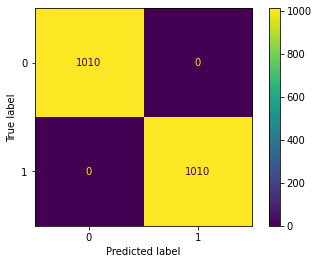

In [18]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(
...    y_test_single, y_pred_single)

In [19]:
len(y_pred)

2020

In [20]:
sklearn.metrics.f1_score(
...    y_test_single, y_pred_single)

1.0

In [21]:
history2.history

{'loss': [20.32173728942871, 0.0, 0.0, 0.0, 0.0, 0.0],
 'accuracy': [0.9904499053955078, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.18010281026363373,
  0.18010281026363373,
  0.18010281026363373,
  0.18010281026363373,
  0.18010281026363373,
  0.18010281026363373],
 'val_accuracy': [0.9995049238204956,
  0.9995049238204956,
  0.9995049238204956,
  0.9995049238204956,
  0.9995049238204956,
  0.9995049238204956]}